In [137]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Importation des données de l'organisme "EdStats All Indicator Query" de la Banque modiale

In [138]:
EdStatsData=pd.read_csv('EdStatsData.csv')
#EdStatsSeries=pd.read_csv('EdStatsSeries.csv')

In [139]:
print(EdStatsData.shape)
EdStatsData=EdStatsData.dropna(thresh=6)
print(f'Dimession: {EdStatsData.shape[0]}')
EdStatsData.head()

(886930, 70)
Dimession: 319129


,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.365540,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Arab World,ARB,"Adjusted net enrolment rate, primary, female (%)",SE.PRM.TENR.FE,43.351101,43.318150,44.640701,45.845718,46.449501,48.363892,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Arab World,ARB,"Adjusted net enrolment rate, primary, gender p...",UIS.NERA.1.GPI,0.658570,0.656400,0.663290,0.672040,0.672610,0.691760,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Arab World,ARB,"Adjusted net enrolment rate, primary, male (%)",SE.PRM.TENR.MA,65.826233,65.993584,67.301857,68.219078,69.059013,69.914551,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,Arab World,ARB,Adjusted net intake rate to Grade 1 of primary...,UIS.NIRA.1,52.448921,52.489750,52.635593,53.327000,54.184654,54.865627,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


On se retouve avec une base de donnes 319129 individus dont 70 parametres 

## Recherche d'indicateurs pertinantes

Apres une recherche sur les 4000 indicateurs proposés par la banque mondiale, j'ai finalement selection 14 indicateurs qui sont en rapport avec le projet d'édute a savoir: la porposition de cetenus de formation en ligne pour un public de niveau lycée et université.


##### Indicateurs retenus

1- Part des jeunes qui ne sont ni aux études, ni en emploi, ni en formation, total (% de la population des jeunes):

          Share of youth not in education, employment, or training, total (% of youth population)'.
          
2- Pourcentage des personnes qui ont accées a internet:
          
          Internet users (per 100 people)
          
3- Taux de passage effectif du primaire au premier cycle de l'enseignement secondaire général, hommes et femmes (%):

          Effective transition rate from primary to lower secondary general education, both sexes (%)
          
4- Taux d'achèvement du premier cycle du secondaire, les deux sexes (%):
   
         Lower secondary completion rate, both sexes (%)
         
5- Taux d'abandon en 1ère année de l'enseignement secondaire inférieur général, les deux sexes (%)':

         Drop-out rate from Grade 1 of lower secondary general education, both sexes (%)

6- Taux net total de scolarisation, premier cycle du secondaire, les deux sexes (%):

         Total net enrolment rate, lower secondary, both sexes (%)

7- Taux d'abandon cumulé en dernière année du premier cycle de l'enseignement secondaire général, hommes et femmes (%):

         Cumulative drop-out rate to the last grade of lower secondary general education, both sexes (%)
        
8- Taux d'adolescents non scolarisés en âge de fréquenter le premier cycle du secondaire, les deux sexes (données          d'enquête auprès des ménages) (%)':

         UIS: Rate of out-of-school adolescents of lower secondary school age, both sexes (household survey data) (%)'


9- Taux net de fréquentation scolaire, premier cycle du secondaire, les deux sexes (%)':

         
         UIS: Total net attendance rate, lower secondary, poorest quintile, both sexes (%)
       
10- Taux de chômage:

         Unemployment, total (% of total labor force)
         
11- Taux brut d'obtention d'un diplôme dans les programmes de premier cycle (CITE 6 et 7) dans l'enseignement               supérieur:
  
          Gross graduation ratio from first degree programs (ISCED 6 and 7) in tertiary education, both sexes (%)
  

           
12- Rapport de flux net d'étudiants en mobilité internationale (entrants - sortants), hommes et femmes (%):

          Net flow ratio of internationally mobile students (inbound - outbound), both sexes (%)

13- Taux de Compréhension en lecture:
          
          EGRA: Reading Comprehension - Share of students with a zero score (%). English. 3rd Grade

          





          



           

In [140]:
# recheche d'indicateur pertinant
#mots_cle=['training','illiterate',"internet","computer",'index','rate']
tab=[]
indicateurs=EdStatsData['Indicator Name']
for indicateur in indicateurs:
  if 'user'.lower() in indicateur.lower():
    if indicateur not in tab:
      tab.append(indicateur)
tab

['Internet users (per 100 people)']

In [141]:
List_indicator=[
    'Share of youth not in education, employment, or training, total (% of youth population)',
    'Internet users (per 100 people)',
    'Effective transition rate from primary to lower secondary general education, both sexes (%)',
    'Lower secondary completion rate, both sexes (%)',
    'Drop-out rate from Grade 1 of lower secondary general education, both sexes (%)',
    'Total net enrolment rate, lower secondary, both sexes (%)',
    'Cumulative drop-out rate to the last grade of lower secondary general education, both sexes (%)',
    'UIS: Rate of out-of-school adolescents of lower secondary school age, both sexes (household survey data) (%)',
    'UIS: Total net attendance rate, lower secondary, poorest quintile, both sexes (%)',
    "UIS: Percentage of population age 25+ with at least a completed master's degree or equivalent (ISCED 7 or higher). Gender Parity Index",
    'Unemployment, total (% of total labor force)',
    'Gross graduation ratio from first degree programs (ISCED 6 and 7) in tertiary education, both sexes (%)',
    'Net flow ratio of internationally mobile students (inbound - outbound), both sexes (%)',
    'EGRA: Reading Comprehension - Share of students with a zero score (%). English. 3rd Grade',
]

len(List_indicator)

#elargeir la recherches d'indicateur pertinent
#cellule markdown a faire 
#correlation entre les 20 variables  pour pouvoir a nouveau

14

In [167]:
dataset=EdStatsData.loc[EdStatsData['Indicator Name'].isin(List_indicator),:]
print(dataset.shape)
dataset.head(10)

(1705, 70)


,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
706,Arab World,ARB,Effective transition rate from primary to lowe...,SE.SEC.PROG.ZS,NaN,68.227730,67.856773,68.520981,68.108566,68.015900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1375,Arab World,ARB,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1518,Arab World,ARB,"Lower secondary completion rate, both sexes (%)",SE.SEC.CMPT.LO.ZS,27.072584,27.071274,27.982430,28.611841,28.804502,29.992538,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3090,Arab World,ARB,"Total net enrolment rate, lower secondary, bot...",UIS.NERT.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3348,Arab World,ARB,"Unemployment, total (% of total labor force)",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4371,East Asia & Pacific,EAS,Effective transition rate from primary to lowe...,SE.SEC.PROG.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5040,East Asia & Pacific,EAS,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5183,East Asia & Pacific,EAS,"Lower secondary completion rate, both sexes (%)",SE.SEC.CMPT.LO.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6755,East Asia & Pacific,EAS,"Total net enrolment rate, lower secondary, bot...",UIS.NERT.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7013,East Asia & Pacific,EAS,"Unemployment, total (% of total labor force)",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Nettoyage de données

In [143]:
percent_missing = dataset.isnull().sum() * 100 / len(dataset)
missing_value_df = pd.DataFrame({'column_name': dataset.columns,
                                 'percent_missing': percent_missing})
print(missing_value_df.shape)
missing_value_df

(70, 2)


,column_name,percent_missing
Country Name,Country Name,0.000000
Country Code,Country Code,0.000000
Indicator Name,Indicator Name,0.000000
Indicator Code,Indicator Code,0.000000
1970,1970,96.539589
...,...,...
2085,2085,100.000000
2090,2090,100.000000
2095,2095,100.000000
2100,2100,100.000000


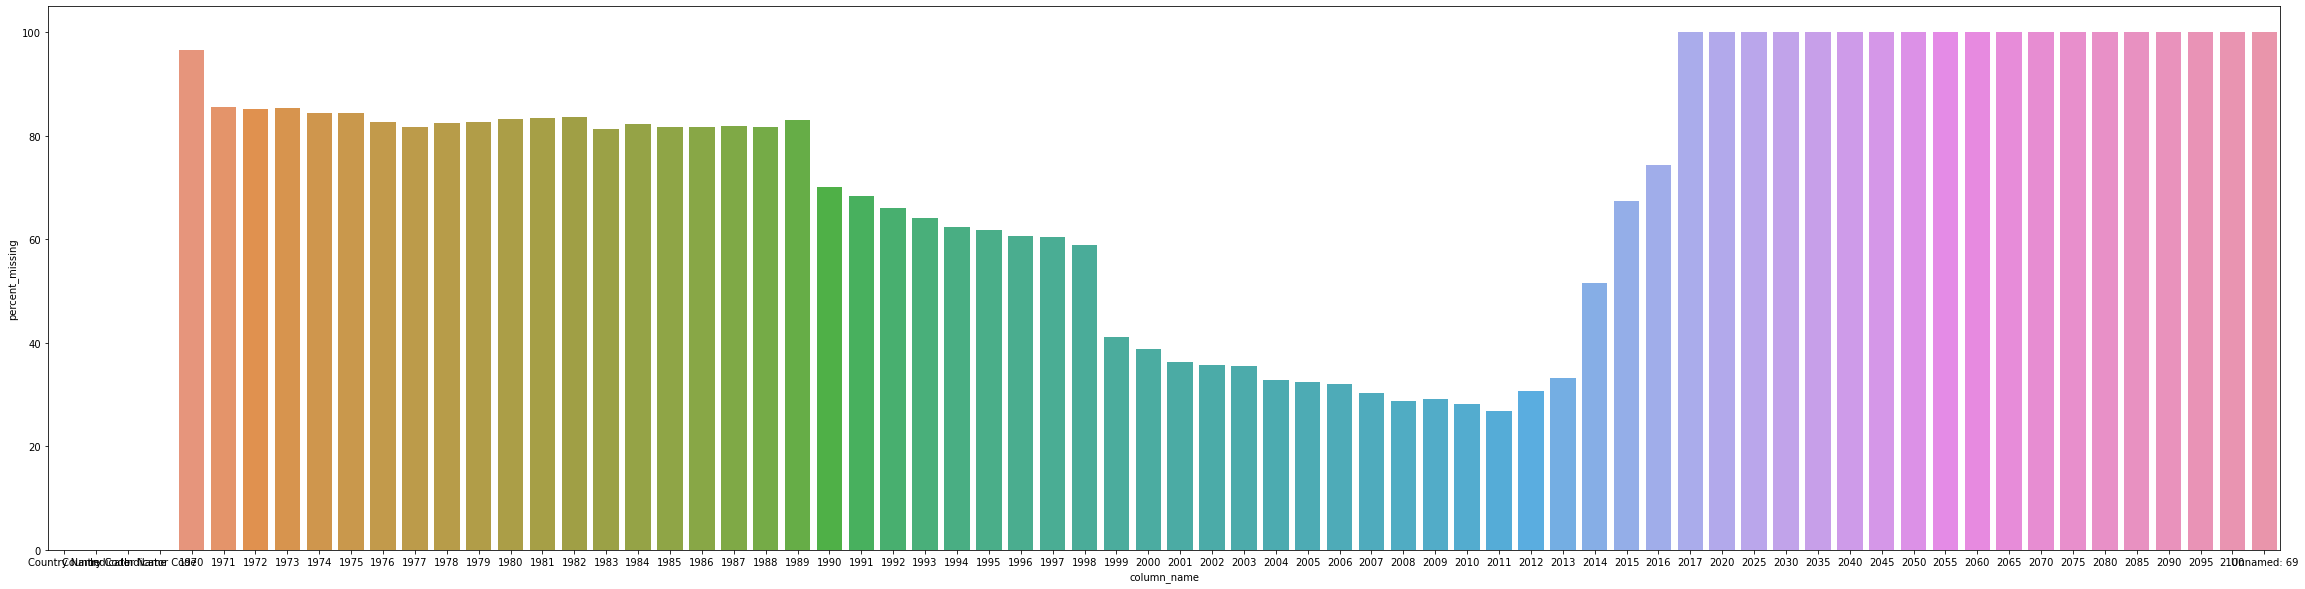

In [144]:
fig, ax = plt.subplots(figsize=(40, 10))
  
sns.barplot(data=missing_value_df, x="column_name", y="percent_missing",ax=ax)


plt.show()

In [9]:
filter_columns1=missing_value_df.loc[missing_value_df['percent_missing']!=100,:]
print(filter_columns1.shape)
filter_columns1

(51, 2)


,column_name,percent_missing
Country Name,Country Name,0.000000
Country Code,Country Code,0.000000
Indicator Name,Indicator Name,0.000000
Indicator Code,Indicator Code,0.000000
1970,1970,96.539589
1971,1971,85.630499
1972,1972,85.102639
1973,1973,85.278592
1974,1974,84.340176
1975,1975,84.457478


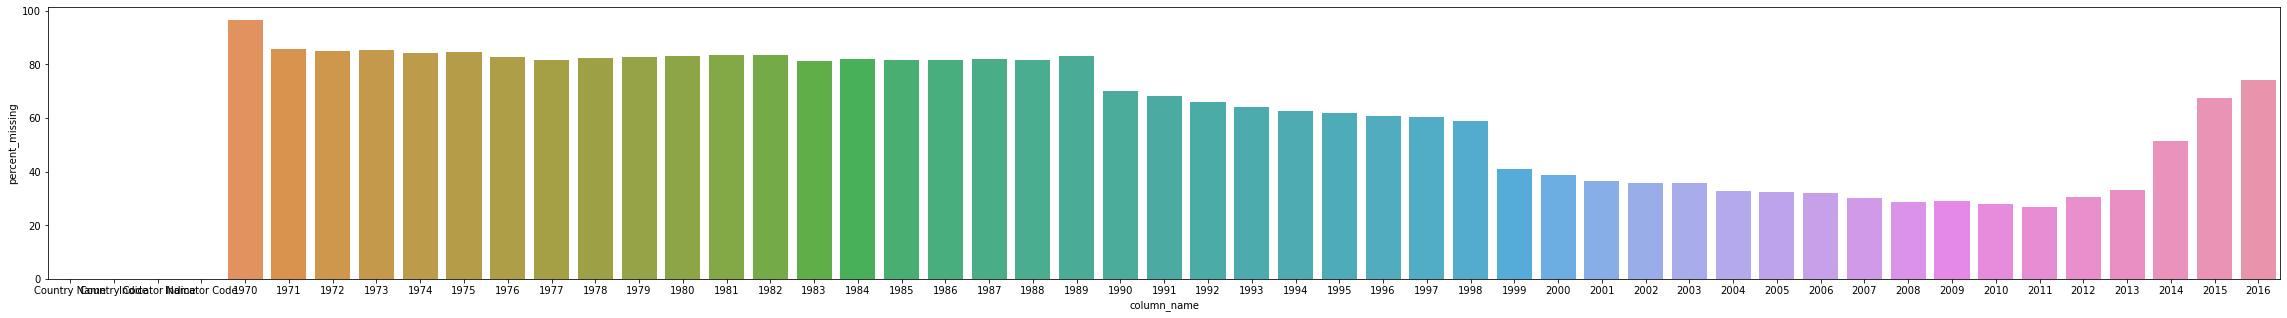

In [10]:
fig, ax = plt.subplots(figsize=(40, 5))
  
sns.barplot(data=filter_columns1, x="column_name", y="percent_missing",ax=ax)


plt.show()

In [168]:
dataset=dataset[filter_columns1.index]
dataset.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
706,Arab World,ARB,Effective transition rate from primary to lowe...,SE.SEC.PROG.ZS,NaN,68.227730,67.856773,68.520981,68.108566,68.015900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1375,Arab World,ARB,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1518,Arab World,ARB,"Lower secondary completion rate, both sexes (%)",SE.SEC.CMPT.LO.ZS,27.072584,27.071274,27.982430,28.611841,28.804502,29.992538,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3090,Arab World,ARB,"Total net enrolment rate, lower secondary, bot...",UIS.NERT.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3348,Arab World,ARB,"Unemployment, total (% of total labor force)",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [169]:
#data=pd.DataFrame(dataset['1971'])
#data.loc[data['1971'].isna()==True,:]=dataset.iloc[:, 1:].ffill(axis=1).iloc[:, -1]
print(dataset.shape)
tab=list(dataset.columns)
for col in reversed(tab):
    if col=='Indicator Code':
        break
    dataset[col]=dataset[col].fillna(dataset.iloc[:, 1:].ffill(axis=1).iloc[:, -1])
dataset.head()
            

(1705, 70)


C:\Users\IHNI7670\AppData\Local\Temp\ipykernel_8240\1874420707.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[col]=dataset[col].fillna(dataset.iloc[:, 1:].ffill(axis=1).iloc[:, -1])


,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
706,Arab World,ARB,Effective transition rate from primary to lowe...,SE.SEC.PROG.ZS,86.762436,68.227730,67.856773,68.520981,68.108566,68.015900,...,86.762436,86.762436,86.762436,86.762436,86.762436,86.762436,86.762436,86.762436,86.762436,86.762436
1375,Arab World,ARB,Internet users (per 100 people),IT.NET.USER.P2,36.868602,36.868602,36.868602,36.868602,36.868602,36.868602,...,36.868602,36.868602,36.868602,36.868602,36.868602,36.868602,36.868602,36.868602,36.868602,36.868602
1518,Arab World,ARB,"Lower secondary completion rate, both sexes (%)",SE.SEC.CMPT.LO.ZS,27.072584,27.071274,27.982430,28.611841,28.804502,29.992538,...,66.964844,66.964844,66.964844,66.964844,66.964844,66.964844,66.964844,66.964844,66.964844,66.964844
3090,Arab World,ARB,"Total net enrolment rate, lower secondary, bot...",UIS.NERT.2,81.547546,81.547546,81.547546,81.547546,81.547546,81.547546,...,81.547546,81.547546,81.547546,81.547546,81.547546,81.547546,81.547546,81.547546,81.547546,81.547546
3348,Arab World,ARB,"Unemployment, total (% of total labor force)",SL.UEM.TOTL.ZS,11.413681,11.413681,11.413681,11.413681,11.413681,11.413681,...,11.413681,11.413681,11.413681,11.413681,11.413681,11.413681,11.413681,11.413681,11.413681,11.413681


## Recuperation de la valeur la plus récente pour chaque indicateur

In [106]:
dataset['Recent_Value'] = dataset.iloc[:, 1:].ffill(axis=1).iloc[:, -1]
dataset

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Recent_Value
706,Arab World,ARB,Effective transition rate from primary to lowe...,SE.SEC.PROG.ZS,NaN,68.227730,67.856773,68.520981,68.108566,68.015900,...,91.480896,91.700409,91.470467,90.504639,86.846031,86.762436,NaN,NaN,NaN,86.762436
1375,Arab World,ARB,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,18.593531,22.973689,26.747251,29.707761,34.014224,36.868602,NaN,NaN,NaN,36.868602
1518,Arab World,ARB,"Lower secondary completion rate, both sexes (%)",SE.SEC.CMPT.LO.ZS,27.072584,27.071274,27.982430,28.611841,28.804502,29.992538,...,62.059536,63.887417,64.701126,66.572159,70.294037,67.428673,66.964844,NaN,NaN,66.964844
3090,Arab World,ARB,"Total net enrolment rate, lower secondary, bot...",UIS.NERT.2,NaN,NaN,NaN,NaN,NaN,NaN,...,81.559517,83.350853,83.666893,84.284782,84.896942,81.021553,81.547546,NaN,NaN,81.547546
3348,Arab World,ARB,"Unemployment, total (% of total labor force)",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,10.570016,10.381222,10.404389,11.399606,11.505669,11.413681,NaN,NaN,NaN,11.413681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884927,Zimbabwe,ZWE,Net flow ratio of internationally mobile stude...,UIS.MENFR.56,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-25.739080,-30.071289,-16.657450,NaN,NaN,NaN,NaN,-16.65745
886355,Zimbabwe,ZWE,"Total net enrolment rate, lower secondary, bot...",UIS.NERT.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,87.858040,91.815872,NaN,NaN,NaN,91.815872
886525,Zimbabwe,ZWE,UIS: Rate of out-of-school adolescents of lowe...,UIS.ROFST.H.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,18.928778,NaN,NaN,NaN,NaN,NaN,NaN,18.928778
886585,Zimbabwe,ZWE,"UIS: Total net attendance rate, lower secondar...",UIS.NART.2.Q1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,73.451668,NaN,NaN,NaN,NaN,NaN,NaN,73.451668


In [11]:
dataset=dataset[['Country Name','Indicator Name','Recent_Value']]
dataset

,Country Name,Indicator Name,Recent_Value
706,Arab World,Effective transition rate from primary to lowe...,86.762436
1375,Arab World,Internet users (per 100 people),36.868602
1518,Arab World,"Lower secondary completion rate, both sexes (%)",66.964844
3090,Arab World,"Total net enrolment rate, lower secondary, bot...",81.547546
3348,Arab World,"Unemployment, total (% of total labor force)",11.413681
...,...,...,...
884927,Zimbabwe,Net flow ratio of internationally mobile stude...,-16.65745
886355,Zimbabwe,"Total net enrolment rate, lower secondary, bot...",91.815872
886525,Zimbabwe,UIS: Rate of out-of-school adolescents of lowe...,18.928778
886585,Zimbabwe,"UIS: Total net attendance rate, lower secondar...",73.451668


In [14]:
dataset.head()

,Country Name,Indicator Name,Recent_Value
706,Arab World,Effective transition rate from primary to lowe...,86.762436
708,Arab World,Effective transition rate from primary to lowe...,1.01488
1375,Arab World,Internet users (per 100 people),36.868602
1518,Arab World,"Lower secondary completion rate, both sexes (%)",66.964844
1520,Arab World,"Lower secondary completion rate, gender parity...",0.97784


In [12]:
dataset=pd.pivot_table(dataset, values='Recent_Value', index='Country Name',columns='Indicator Name')


In [13]:
dataset.head()
#dataset.reset_index(level=0)


Indicator Name,"Cumulative drop-out rate to the last grade of lower secondary general education, both sexes (%)","Drop-out rate from Grade 1 of lower secondary general education, both sexes (%)",EGRA: Reading Comprehension - Share of students with a zero score (%). English. 3rd Grade,"Effective transition rate from primary to lower secondary general education, both sexes (%)",Internet users (per 100 people),"Lower secondary completion rate, both sexes (%)","Net flow ratio of internationally mobile students (inbound - outbound), both sexes (%)","Share of youth not in education, employment, or training, total (% of youth population)","Total net enrolment rate, lower secondary, both sexes (%)",UIS: Percentage of population age 25+ with at least a completed master's degree or equivalent (ISCED 7 or higher). Gender Parity Index,"UIS: Rate of out-of-school adolescents of lower secondary school age, both sexes (household survey data) (%)","UIS: Total net attendance rate, lower secondary, poorest quintile, both sexes (%)","Unemployment, total (% of total labor force)"
Country Name,,,,,,,,,,,,,
Afghanistan,6.021660,40.747398,NaN,89.529808,10.595726,17.049290,NaN,NaN,65.498222,NaN,NaN,NaN,8.6
Albania,1.709740,0.504100,NaN,99.080360,66.363445,97.159943,-12.14132,NaN,95.657043,NaN,NaN,NaN,15.2
Algeria,26.107531,7.316350,NaN,99.002136,42.945527,76.306610,-1.06117,NaN,78.678642,NaN,NaN,NaN,11.5
Andorra,11.850780,1.560470,NaN,NaN,97.930637,NaN,-182.34201,NaN,NaN,NaN,NaN,NaN,NaN
Angola,NaN,4.880160,NaN,52.481670,13.000000,22.517611,NaN,NaN,82.804916,NaN,NaN,NaN,6.1


In [14]:
datatest=dataset


In [15]:
percent_missing2 = dataset.isnull().sum() * 100 / len(dataset)
missing_value_df2 = pd.DataFrame({'column_name': dataset.columns,
                                 'percent_missing': percent_missing2})
print(missing_value_df.shape)
missing_value_df2

(70, 2)


,column_name,percent_missing
Indicator Name,,
"Cumulative drop-out rate to the last grade of lower secondary general education, both sexes (%)",Cumulative drop-out rate to the last grade of ...,22.649573
"Drop-out rate from Grade 1 of lower secondary general education, both sexes (%)",Drop-out rate from Grade 1 of lower secondary ...,21.794872
EGRA: Reading Comprehension - Share of students with a zero score (%). English. 3rd Grade,EGRA: Reading Comprehension - Share of student...,99.572650
"Effective transition rate from primary to lower secondary general education, both sexes (%)",Effective transition rate from primary to lowe...,11.538462
Internet users (per 100 people),Internet users (per 100 people),1.709402
"Lower secondary completion rate, both sexes (%)","Lower secondary completion rate, both sexes (%)",11.538462
"Net flow ratio of internationally mobile students (inbound - outbound), both sexes (%)",Net flow ratio of internationally mobile stude...,41.880342
"Share of youth not in education, employment, or training, total (% of youth population)","Share of youth not in education, employment, o...",76.068376
"Total net enrolment rate, lower secondary, both sexes (%)","Total net enrolment rate, lower secondary, bot...",20.085470


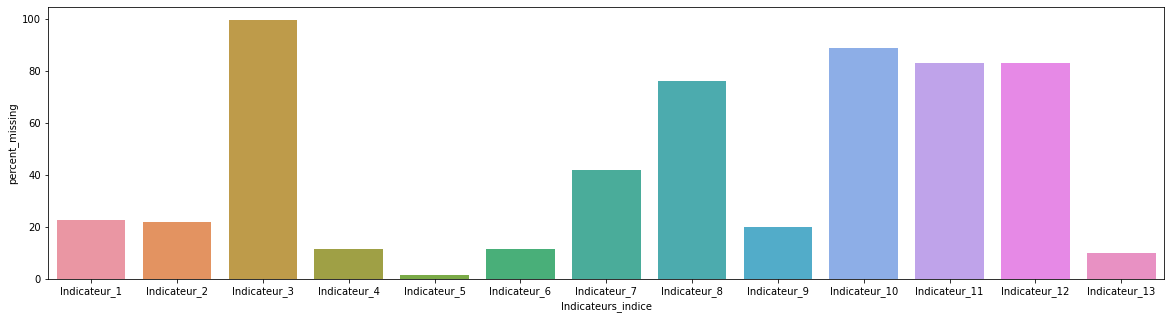

In [65]:
Indicateurs=[f'Indicateur_{i+1}' for i in range(percent_missing2.shape[0])]
missing_value_df2['Indicateurs_indice']=Indicateurs
fig, ax = plt.subplots(figsize=(20, 5))
  
sns.barplot(data=missing_value_df2, x="Indicateurs_indice", y="percent_missing",ax=ax)
#missing_value_df2.plot.pie(y='percent_missing',figsize=(20, 5))

plt.show()

In [16]:
filter_columns2=missing_value_df2.loc[missing_value_df2['percent_missing']<=76,:]
print(filter_columns2.shape)
filter_columns2

(8, 2)


,column_name,percent_missing
Indicator Name,,
"Cumulative drop-out rate to the last grade of lower secondary general education, both sexes (%)",Cumulative drop-out rate to the last grade of ...,22.649573
"Drop-out rate from Grade 1 of lower secondary general education, both sexes (%)",Drop-out rate from Grade 1 of lower secondary ...,21.794872
"Effective transition rate from primary to lower secondary general education, both sexes (%)",Effective transition rate from primary to lowe...,11.538462
Internet users (per 100 people),Internet users (per 100 people),1.709402
"Lower secondary completion rate, both sexes (%)","Lower secondary completion rate, both sexes (%)",11.538462
"Net flow ratio of internationally mobile students (inbound - outbound), both sexes (%)",Net flow ratio of internationally mobile stude...,41.880342
"Total net enrolment rate, lower secondary, both sexes (%)","Total net enrolment rate, lower secondary, bot...",20.085470
"Unemployment, total (% of total labor force)","Unemployment, total (% of total labor force)",9.829060


C:\Users\IHNI7670\AppData\Local\Temp\ipykernel_3512\2390353204.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_columns2['Indicateurs_indice']=Indicateurs


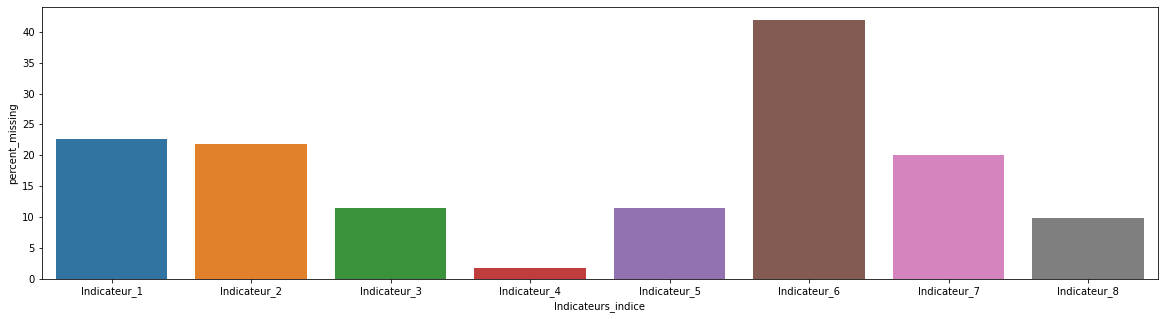

In [68]:

Indicateurs=[f'Indicateur_{i+1}' for i in range(filter_columns2.shape[0])]
filter_columns2['Indicateurs_indice']=Indicateurs
fig, ax = plt.subplots(figsize=(20, 5))
  
sns.barplot(data=filter_columns2, x="Indicateurs_indice", y="percent_missing",ax=ax)
#missing_value_df2.plot.pie(y='percent_missing',figsize=(20, 5))

plt.show()

In [17]:
dataset=dataset[filter_columns2.index]
print(dataset.shape)
dataset


(234, 8)


Indicator Name,"Cumulative drop-out rate to the last grade of lower secondary general education, both sexes (%)","Drop-out rate from Grade 1 of lower secondary general education, both sexes (%)","Effective transition rate from primary to lower secondary general education, both sexes (%)",Internet users (per 100 people),"Lower secondary completion rate, both sexes (%)","Net flow ratio of internationally mobile students (inbound - outbound), both sexes (%)","Total net enrolment rate, lower secondary, both sexes (%)","Unemployment, total (% of total labor force)"
Country Name,,,,,,,,
Afghanistan,6.021660,40.747398,89.529808,10.595726,17.049290,NaN,65.498222,8.600000
Albania,1.709740,0.504100,99.080360,66.363445,97.159943,-12.14132,95.657043,15.200000
Algeria,26.107531,7.316350,99.002136,42.945527,76.306610,-1.06117,78.678642,11.500000
Andorra,11.850780,1.560470,NaN,97.930637,NaN,-182.34201,NaN,NaN
Angola,NaN,4.880160,52.481670,13.000000,22.517611,NaN,82.804916,6.100000
...,...,...,...,...,...,...,...,...
West Bank and Gaza,16.713831,1.884370,98.647102,61.178385,74.571983,-9.81066,86.155182,27.000000
World,NaN,NaN,90.847260,45.910282,76.677330,NaN,83.970589,5.738687
"Yemen, Rep.",14.623690,8.386000,90.457108,24.579208,48.453152,-0.76748,62.593601,16.200001


In [18]:
dataset.head()


Indicator Name,"Cumulative drop-out rate to the last grade of lower secondary general education, both sexes (%)","Drop-out rate from Grade 1 of lower secondary general education, both sexes (%)","Effective transition rate from primary to lower secondary general education, both sexes (%)",Internet users (per 100 people),"Lower secondary completion rate, both sexes (%)","Net flow ratio of internationally mobile students (inbound - outbound), both sexes (%)","Total net enrolment rate, lower secondary, both sexes (%)","Unemployment, total (% of total labor force)"
Country Name,,,,,,,,
Afghanistan,6.021660,40.747398,89.529808,10.595726,17.049290,NaN,65.498222,8.6
Albania,1.709740,0.504100,99.080360,66.363445,97.159943,-12.14132,95.657043,15.2
Algeria,26.107531,7.316350,99.002136,42.945527,76.306610,-1.06117,78.678642,11.5
Andorra,11.850780,1.560470,NaN,97.930637,NaN,-182.34201,NaN,NaN
Angola,NaN,4.880160,52.481670,13.000000,22.517611,NaN,82.804916,6.1


## Recherche et suppression d'indicateurs correlés

#### Corrélation de Pearson

Le coefficient de Pearson est un indice reflétant une relation linéaire entre deux variables continues. Le coefficient de corrélation varie entre -1 et +1, 0 reflétant une relation nulle entre les deux variables, une valeur négative (corrélation négative) signifiant que lorsqu'une des variable augmente, l'autre diminue ; tandis qu'une valeur positive (corrélation positive) indique que les deux variables varient ensemble dans le même sens

In [19]:
dataset=dataset.reset_index(level=0)
corr_dataset=dataset.corr()

In [20]:
corr_dataset

Indicator Name,"Cumulative drop-out rate to the last grade of lower secondary general education, both sexes (%)","Drop-out rate from Grade 1 of lower secondary general education, both sexes (%)","Effective transition rate from primary to lower secondary general education, both sexes (%)",Internet users (per 100 people),"Lower secondary completion rate, both sexes (%)","Net flow ratio of internationally mobile students (inbound - outbound), both sexes (%)","Total net enrolment rate, lower secondary, both sexes (%)","Unemployment, total (% of total labor force)"
Indicator Name,,,,,,,,
"Cumulative drop-out rate to the last grade of lower secondary general education, both sexes (%)",1.000000,0.779879,-0.452022,-0.464933,-0.655134,-0.020268,-0.443204,0.014833
"Drop-out rate from Grade 1 of lower secondary general education, both sexes (%)",0.779879,1.000000,-0.409249,-0.486615,-0.568144,0.010305,-0.478881,0.038431
"Effective transition rate from primary to lower secondary general education, both sexes (%)",-0.452022,-0.409249,1.000000,0.527488,0.638941,0.136029,0.657121,0.097517
Internet users (per 100 people),-0.464933,-0.486615,0.527488,1.000000,0.700929,0.020737,0.725902,-0.024368
"Lower secondary completion rate, both sexes (%)",-0.655134,-0.568144,0.638941,0.700929,1.000000,-0.009274,0.823617,-0.013913
"Net flow ratio of internationally mobile students (inbound - outbound), both sexes (%)",-0.020268,0.010305,0.136029,0.020737,-0.009274,1.000000,0.019341,-0.283392
"Total net enrolment rate, lower secondary, both sexes (%)",-0.443204,-0.478881,0.657121,0.725902,0.823617,0.019341,1.000000,0.028641
"Unemployment, total (% of total labor force)",0.014833,0.038431,0.097517,-0.024368,-0.013913,-0.283392,0.028641,1.000000


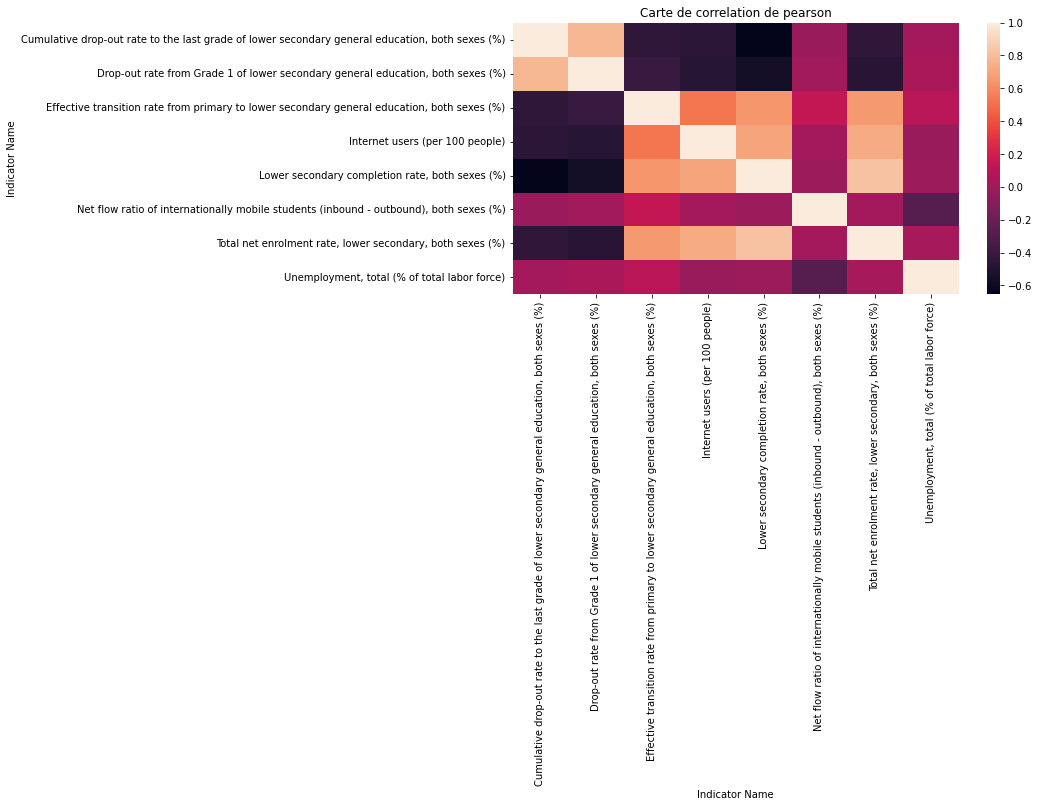

In [76]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(corr_dataset,ax=ax).set_title('Carte de correlation de pearson')
plt.show()

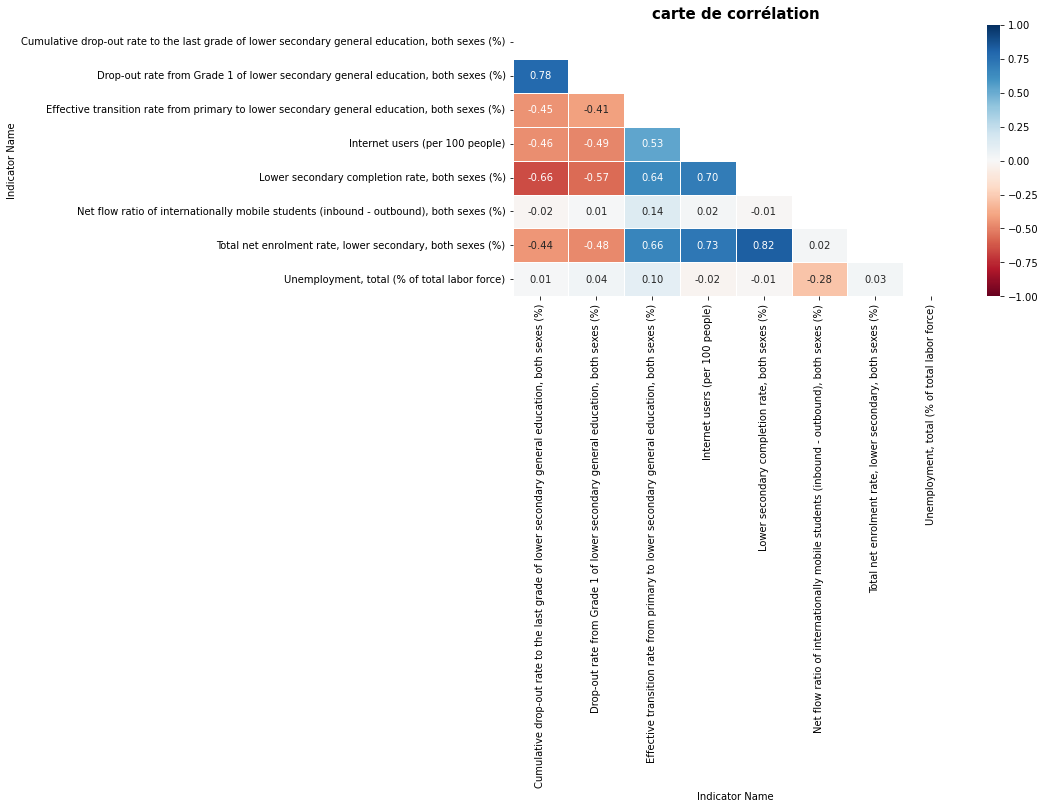

In [78]:
fig, ax = plt.subplots(figsize=(10, 5))
mask=np.triu(np.ones_like(corr_dataset,dtype=bool))
sns.heatmap(corr_dataset,mask=mask,center=0,cmap='RdBu',linewidths=1,annot=True,fmt=".2f",vmin=-1,vmax=1,ax=ax)
plt.title("carte de corrélation",fontsize=15,fontweight='bold')
plt.show()

In [21]:
# Create correlation matrix
corr_matrix = corr_dataset.abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.60)]

# Drop features 


C:\Users\IHNI7670\AppData\Local\Temp\ipykernel_8880\786652760.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [22]:
dataset.drop(to_drop, axis=1, inplace=True)

######
        

In [23]:
dataset

Indicator Name,Country Name,"Cumulative drop-out rate to the last grade of lower secondary general education, both sexes (%)","Effective transition rate from primary to lower secondary general education, both sexes (%)",Internet users (per 100 people),"Net flow ratio of internationally mobile students (inbound - outbound), both sexes (%)","Unemployment, total (% of total labor force)"
0,Afghanistan,6.021660,89.529808,10.595726,NaN,8.600000
1,Albania,1.709740,99.080360,66.363445,-12.14132,15.200000
2,Algeria,26.107531,99.002136,42.945527,-1.06117,11.500000
3,Andorra,11.850780,NaN,97.930637,-182.34201,NaN
4,Angola,NaN,52.481670,13.000000,NaN,6.100000
...,...,...,...,...,...,...
229,West Bank and Gaza,16.713831,98.647102,61.178385,-9.81066,27.000000
230,World,NaN,90.847260,45.910282,NaN,5.738687
231,"Yemen, Rep.",14.623690,90.457108,24.579208,-0.76748,16.200001
232,Zambia,10.896960,63.915981,25.506579,NaN,7.600000


In [24]:
dataset=dataset.rename(
    columns={
             'Cumulative drop-out rate to the last grade of lower secondary general education, both sexes (%)':"Taux d'abandon cumulé en dernière année du premier cycle de l'enseignement secondaire général, hommes et femmes (%)",
             "Effective transition rate from primary to lower secondary general education, both sexes (%)":"Taux de passage effectif du primaire au premier cycle de l'enseignement secondaire général, hommes et femmes (%)",
             "Internet users (per 100 people)":"taux d'accés a internet",
             "Net flow ratio of internationally mobile students (inbound - outbound), both sexes (%)":"Rapport de flux net d'étudiants en mobilité internationale (entrants - sortants), hommes et femmes (%)",
             "Unemployment, total (% of total labor force)":"Taux de chômage"
             
             
})

In [25]:
dataset

Indicator Name,Country Name,"Taux d'abandon cumulé en dernière année du premier cycle de l'enseignement secondaire général, hommes et femmes (%)","Taux de passage effectif du primaire au premier cycle de l'enseignement secondaire général, hommes et femmes (%)",taux d'accés a internet,"Rapport de flux net d'étudiants en mobilité internationale (entrants - sortants), hommes et femmes (%)",Taux de chômage
0,Afghanistan,6.021660,89.529808,10.595726,NaN,8.600000
1,Albania,1.709740,99.080360,66.363445,-12.14132,15.200000
2,Algeria,26.107531,99.002136,42.945527,-1.06117,11.500000
3,Andorra,11.850780,NaN,97.930637,-182.34201,NaN
4,Angola,NaN,52.481670,13.000000,NaN,6.100000
...,...,...,...,...,...,...
229,West Bank and Gaza,16.713831,98.647102,61.178385,-9.81066,27.000000
230,World,NaN,90.847260,45.910282,NaN,5.738687
231,"Yemen, Rep.",14.623690,90.457108,24.579208,-0.76748,16.200001
232,Zambia,10.896960,63.915981,25.506579,NaN,7.600000


In [26]:
data=dataset
dataset=dataset.fillna(dataset.mean())
dataset.head()

C:\Users\IHNI7670\AppData\Local\Temp\ipykernel_8880\1473101298.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset=dataset.fillna(dataset.mean())


Indicator Name,Country Name,"Taux d'abandon cumulé en dernière année du premier cycle de l'enseignement secondaire général, hommes et femmes (%)","Taux de passage effectif du primaire au premier cycle de l'enseignement secondaire général, hommes et femmes (%)",taux d'accés a internet,"Rapport de flux net d'étudiants en mobilité internationale (entrants - sortants), hommes et femmes (%)",Taux de chômage
0,Afghanistan,6.021660,89.529808,10.595726,-9.114635,8.600000
1,Albania,1.709740,99.080360,66.363445,-12.141320,15.200000
2,Algeria,26.107531,99.002136,42.945527,-1.061170,11.500000
3,Andorra,11.850780,90.985786,97.930637,-182.342010,8.513168
4,Angola,14.183500,52.481670,13.000000,-9.114635,6.100000


In [28]:
print(dataset.shape)
dataset.head(5)

(234, 6)


Indicator Name,Country Name,"Taux d'abandon cumulé en dernière année du premier cycle de l'enseignement secondaire général, hommes et femmes (%)","Taux de passage effectif du primaire au premier cycle de l'enseignement secondaire général, hommes et femmes (%)",taux d'accés a internet,"Rapport de flux net d'étudiants en mobilité internationale (entrants - sortants), hommes et femmes (%)",Taux de chômage
0,Afghanistan,6.021660,89.529808,10.595726,0.427350,8.600000
1,Albania,1.709740,99.080360,66.363445,0.569260,15.200000
2,Algeria,26.107531,99.002136,42.945527,0.049754,11.500000
3,Andorra,11.850780,90.985786,97.930637,8.549321,8.513168
4,Angola,14.183500,52.481670,13.000000,0.427350,6.100000


In [119]:
import os  
os.makedirs(' Desktop/Openclassrooms/projet 2', exist_ok=True)  
dataset.to_csv('dataset.csv')




documentation sur geopandas

# Analyse de données

##### Objectif

    Apes avoir nettoyer nos données et filtrer les indicteures pertinentes, notre objectif dans cette partie est       d'une part faire une analyse graphique des indicateur et d'autre part proposer une liste de pays 
    conrrespondant au critere de l'entreprise.

### 1-Analyse des indicateurs par continent

#### Taux d'accés a internet

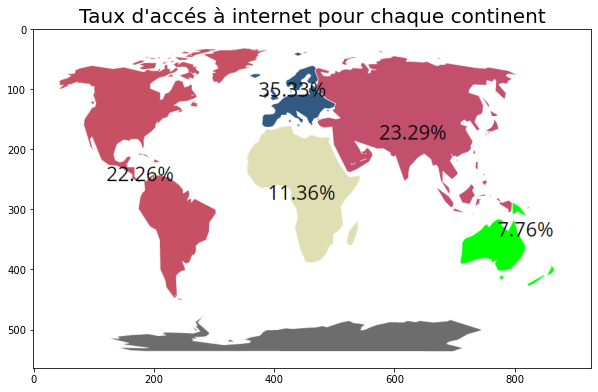

In [44]:
im= plt.imread("I02.png")
fig, ax = plt.subplots(figsize=(10, 8))
im=ax.imshow(im)
#axs[1,1].imshow(im3)
plt.title("Taux d'accés à internet pour chaque continent",size=20)
plt.show()

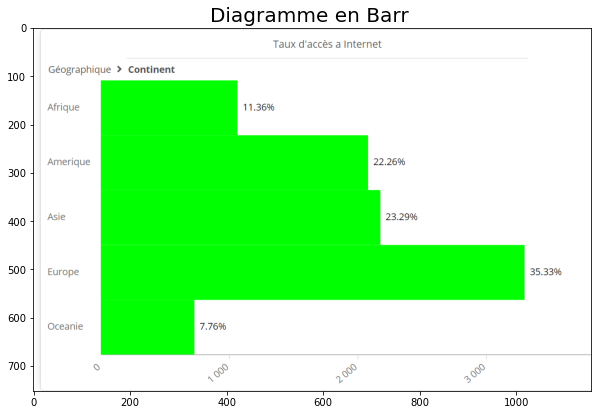

In [45]:
im = plt.imread("I01.png")
fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(im)
plt.title("Diagramme en Barr ",size=20)
plt.show()

##### Remarque:
     D'après l'analyse des différents continents et de leur taux d'accebilité à internet par ces habitants, nous
     pouvons en déduire que le continent le plus interessant pour implenter le site est l'Europe avec un taux de 
     35,33% qui est le plus élevé. En revanche, nous voyons également que le taux en Asie et en Amérique sont
     également élevé avec respectivement 23,29% et 22,26%. Il serait alors important de proposer le service dans ces
     deux continents ci.
     L'analyse nous a permit de voir le déploiement possible du site dans le monde, on en dégage donc trois 
     continents qui permetterait un champ d'action plus large et ainsi une meilleure possibilité de bon
     développement du site. 

#### Taux de chomage

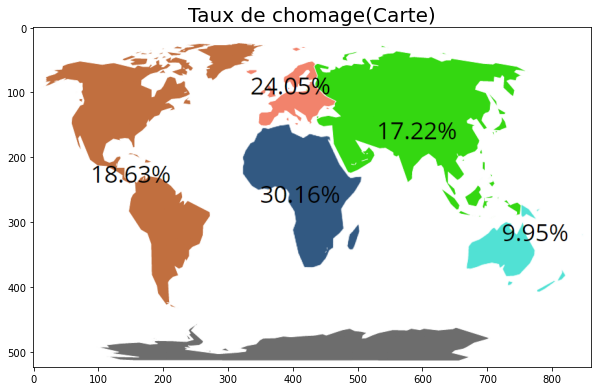

In [55]:
im= plt.imread("I11.png")
fig, ax = plt.subplots(figsize=(10, 8))
im=ax.imshow(im)
#axs[1,1].imshow(im3)
plt.title("Taux de chomage(Carte)",size=20)
plt.show()

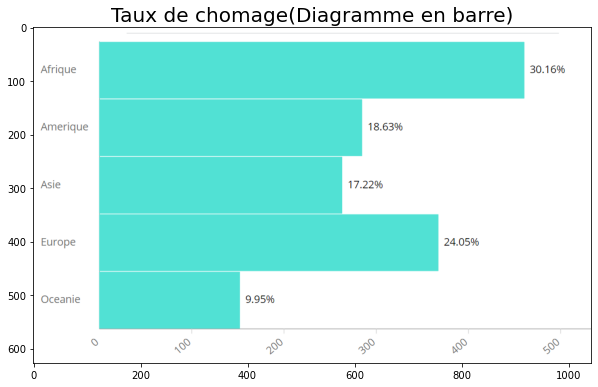

In [47]:
im= plt.imread("I12.png")
fig, ax = plt.subplots(figsize=(10, 8))
im=ax.imshow(im)
#axs[1,1].imshow(im3)
plt.title("Taux de chomage(Diagramme en barre)",size=20)
plt.show()

#### Remarque:
               Etant donnée que l'accés a la formation a un apport important sur le taux de chomage, en effet plus
               une population n'est pas formé plus le nombre chomeur augmente.
               
               d'apres l'analyse des diferents continents sur le taux de chomage,nous pouvons en deduire que
               l'Afrique est le potentiel continent ou on peut implenter le site avec un taux de 30.16% qui est 
               le plus élevé.En revanche, nous voyons également que le taux en Europe est élevé avec 24,05%.
               Il serait alors important de proposer le service dans ce continent ci.

#### Taux de passage du primaire au premier cycle du secondaire

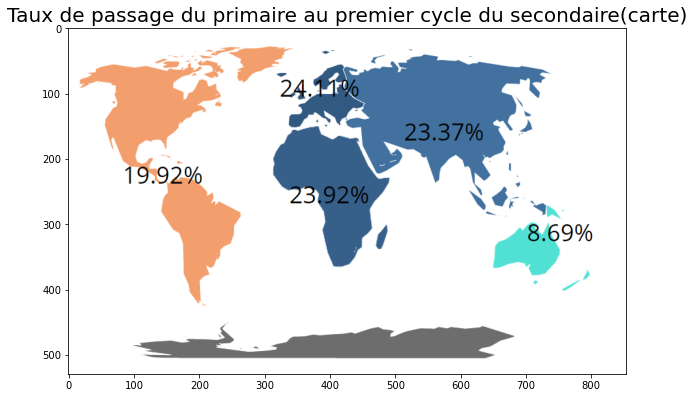

In [57]:
im= plt.imread("I22.png")
fig, ax = plt.subplots(figsize=(10, 8))
im=ax.imshow(im)
#axs[1,1].imshow(im3)
plt.title("Taux de passage du primaire au premier cycle du secondaire(carte)",size=20)
plt.show()

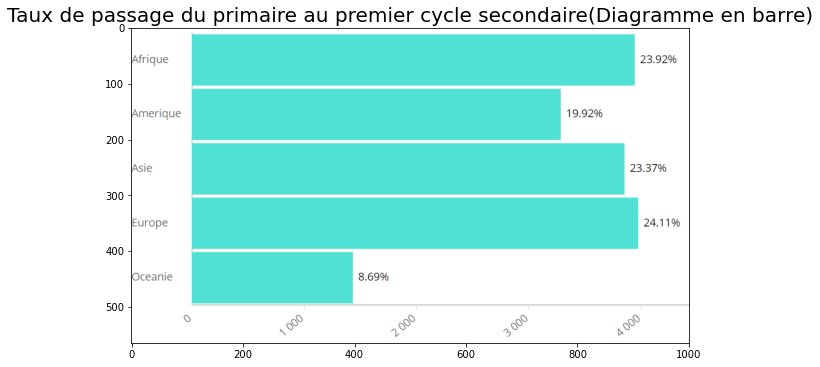

In [49]:
im= plt.imread("I21.png")
fig, ax = plt.subplots(figsize=(10, 8))
im=ax.imshow(im)
#axs[1,1].imshow(im3)
plt.title("Taux de passage du primaire au premier cycle secondaire(Diagramme en barre)",size=20)
plt.show()

##### Remarque:
              L'Europe, l'Afrique et l'Asie sont les potentiels continent avec un 
              taux de passage du primaire au premier cycle du secondaire 
              respectivement 24.11%,23.92 et 23.37%

#### Flux d'étudiants en mobilité international

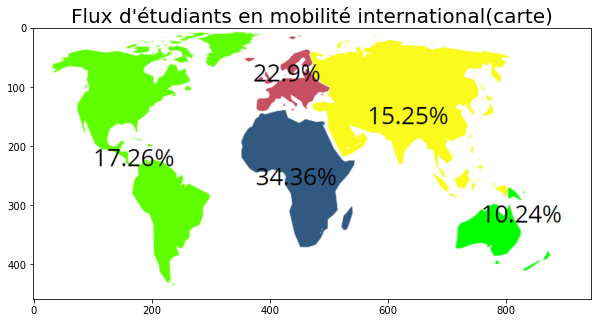

In [50]:
im= plt.imread("I31.png")
fig, ax = plt.subplots(figsize=(10, 8))
im=ax.imshow(im)
#axs[1,1].imshow(im3)
plt.title("Flux d'étudiants en mobilité international(carte)",size=20)
plt.show()

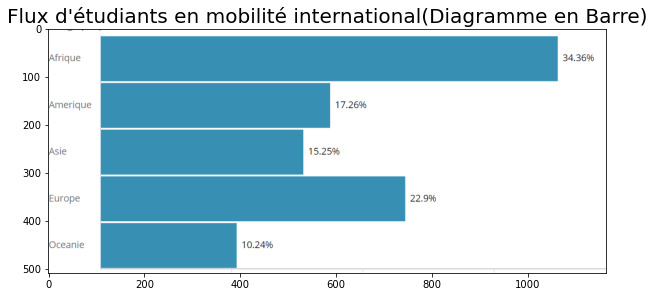

In [51]:
im= plt.imread("I32.png")
fig, ax = plt.subplots(figsize=(10, 8))
im=ax.imshow(im)
#axs[1,1].imshow(im3)
plt.title("Flux d'étudiants en mobilité international(Diagramme en Barre)",size=20)
plt.show()

#### Remarque

L'Oceanie ,l'Europe,l'Asie l'amerique sont les continent dont les potentiels sont plus élevés.

#### Taux d'abandon cumulé en derniere années du premier cycle

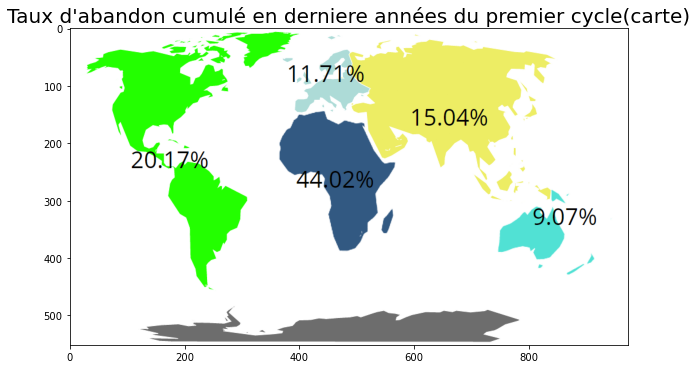

In [53]:
im= plt.imread("I41.png")
fig, ax = plt.subplots(figsize=(10, 8))
im=ax.imshow(im)
#axs[1,1].imshow(im3)
plt.title("Taux d'abandon cumulé en derniere années du premier cycle(carte)",size=20)
plt.show()

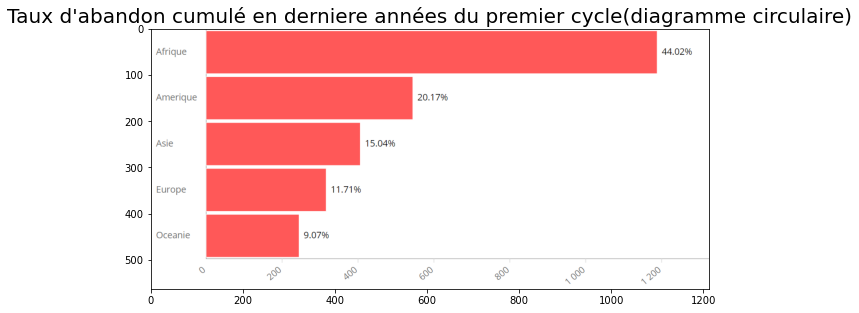

In [54]:
im= plt.imread("I42.png")
fig, ax = plt.subplots(figsize=(10, 8))
im=ax.imshow(im)
#axs[1,1].imshow(im3)
plt.title("Taux d'abandon cumulé en derniere années du premier cycle(diagramme circulaire)",size=20)
plt.show()

#### Remarque:
              Cette fois ci l'Oceanie et l'Europe sont les potentiels continents avec des
              taux respectives de 9.07% et 11.71%. en effet etant donnée que le site 
              propose des cours à partir du lycée,alors plus le taux d'abandon est 
              faible plus la possibilité d'implenté le site est important. 

## Alors quel continent choisir ?

            l'Europe et l'Afrique sont les continents avec un fort potentiel

## 2-Analyse des indicateurs par pays sur les continents Européen et Africain

#### 2-1) Les pays à selectionner en Europe

In [4]:
dataset=pd.read_csv('dataset.csv')
dataset.shape

(234, 7)

In [6]:
europe_list=[
    "Andorra",
    "Albania",
    "Austria",
    "Bosnia and Herzegovina",
    "Belgium",
    "Bulgaria",
    "Belarus",
    "Swiss",
    "Czech Republic",
    "Germany",
    "Denmark",
    "Estonia",
    "Spain",
    "Finland",
    "Faroe Islands",
    "France",
    "UK",
    "Gibraltar",
    "Greece",
    "Croatia",
    "Hungary",
    "Ireland",
    "Iceland",
    "Italy",
    "Liechtenstein",
    "Lithuania",
    "Luxemburg",
    "Latvia",
    "Monaco",
    "Montenegro",
    "Malta",
    "Netherlands",
    "Norway",
    "Poland",
    "Portugal",
    "Romania",
    "Serbia",
    "Sweden",
    "Slovenia",
    "San Marino",
    "Ukraine",

]

len(europe_list)

41

In [7]:
dataset_europe=dataset.loc[dataset['Country Name'].isin(europe_list),:]

In [8]:
dataset_europe.head(5)

,Unnamed: 0,Country Name,"Taux d'abandon cumulé en dernière année du premier cycle de l'enseignement secondaire général, hommes et femmes (%)","Taux de passage effectif du primaire au premier cycle de l'enseignement secondaire général, hommes et femmes (%)",taux d'accés a internet,"Rapport de flux net d'étudiants en mobilité internationale (entrants - sortants), hommes et femmes (%)",Taux de chômage
1,1,Albania,1.70974,99.080360,66.363445,0.569260,15.200000
3,3,Andorra,11.85078,90.985786,97.930637,8.549321,8.513168
11,11,Austria,0.26320,99.931282,84.323331,0.612394,6.000000
17,17,Belarus,0.68239,98.386971,71.113046,0.186463,0.500000
18,18,Belgium,5.54511,98.888344,86.516500,0.311098,7.800000


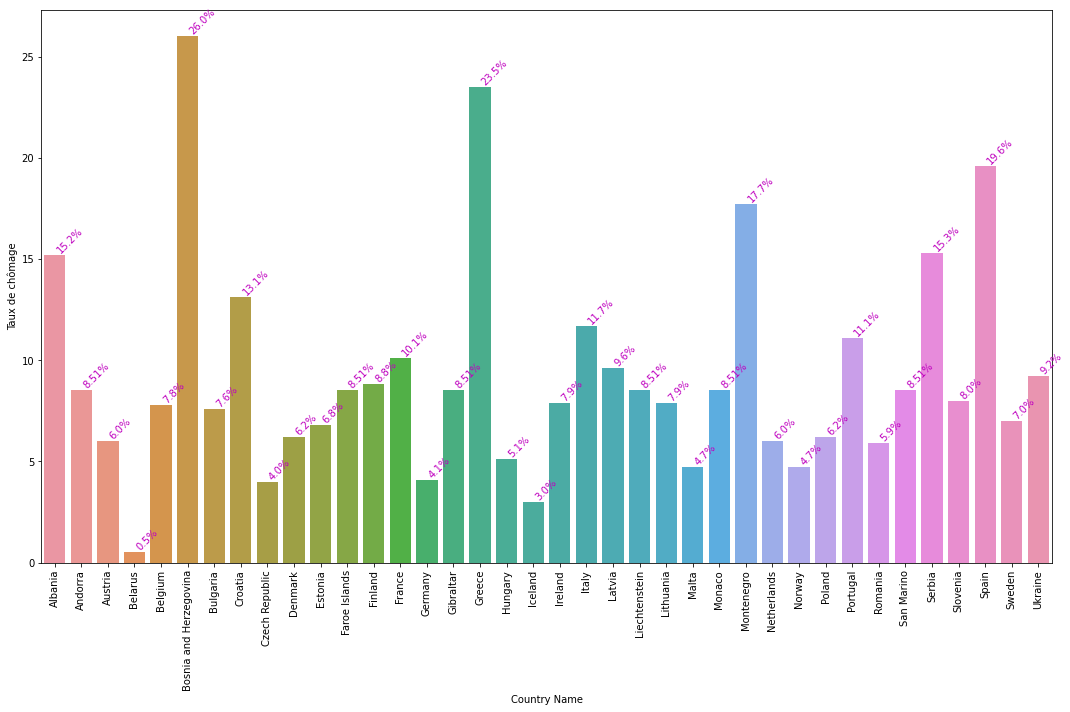

In [68]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x="Country Name", y= "Taux de chômage",data=dataset_europe )
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.set(xlabel="Country Name", ylabel='Taux de chômage')
for item in ax.get_xticklabels():
    item.set_rotation(90)
for i, v in enumerate(dataset_europe["Taux de chômage"].iteritems()):        
    ax.text(i ,v[1], "{:,}%".format(round(v[1],2)), color='m', va ='bottom', 
    rotation=45)
plt.tight_layout()

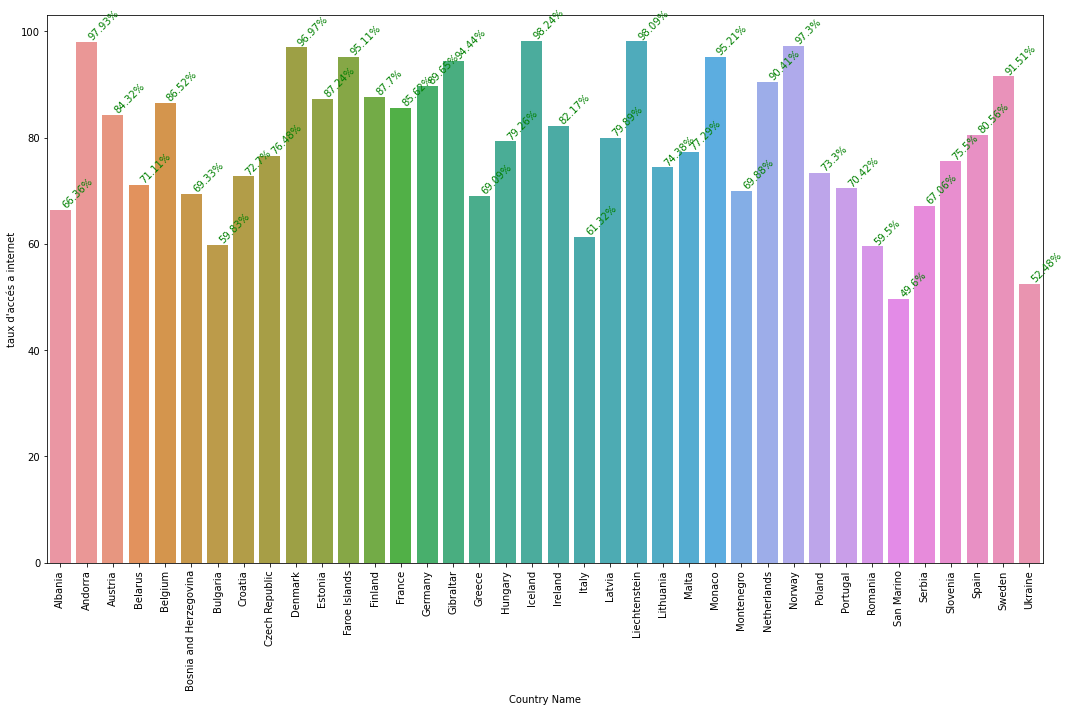

In [14]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x="Country Name", y= "taux d'accés a internet",data=dataset_europe )
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.set(xlabel="Country Name", ylabel="taux d'accés a internet")
for item in ax.get_xticklabels():
    item.set_rotation(90)
for i, v in enumerate(dataset_europe["taux d'accés a internet"].iteritems()):        
    ax.text(i ,v[1], "{:,}%".format(round(v[1],2)), color='g', va ='bottom', 
    rotation=45)
plt.tight_layout()
plt.show()

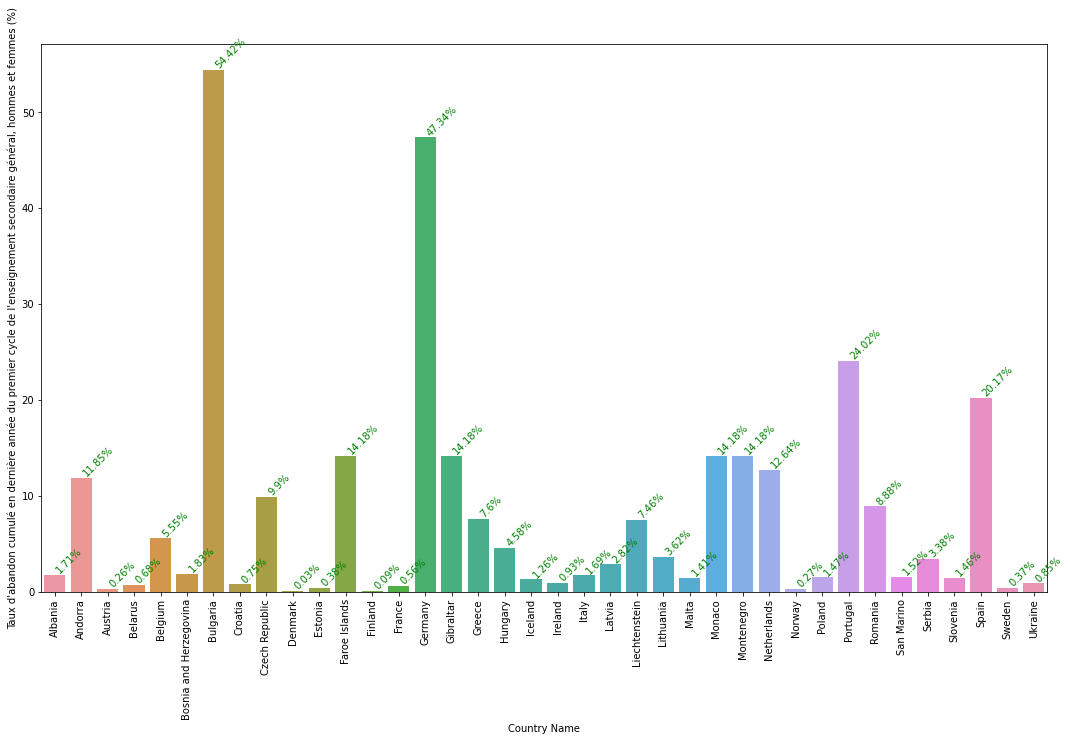

In [72]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x="Country Name", y= "Taux d'abandon cumulé en dernière année du premier cycle de l'enseignement secondaire général, hommes et femmes (%)",data=dataset_europe )
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.set(xlabel="Country Name", ylabel="Taux d'abandon cumulé en dernière année du premier cycle de l'enseignement secondaire général, hommes et femmes (%)")
for item in ax.get_xticklabels():
    item.set_rotation(90)
for i, v in enumerate(dataset_europe["Taux d'abandon cumulé en dernière année du premier cycle de l'enseignement secondaire général, hommes et femmes (%)"].iteritems()):        
    ax.text(i ,v[1], "{:,}%".format(round(v[1],2)), color='g', va ='bottom', 
    rotation=45)
plt.tight_layout()

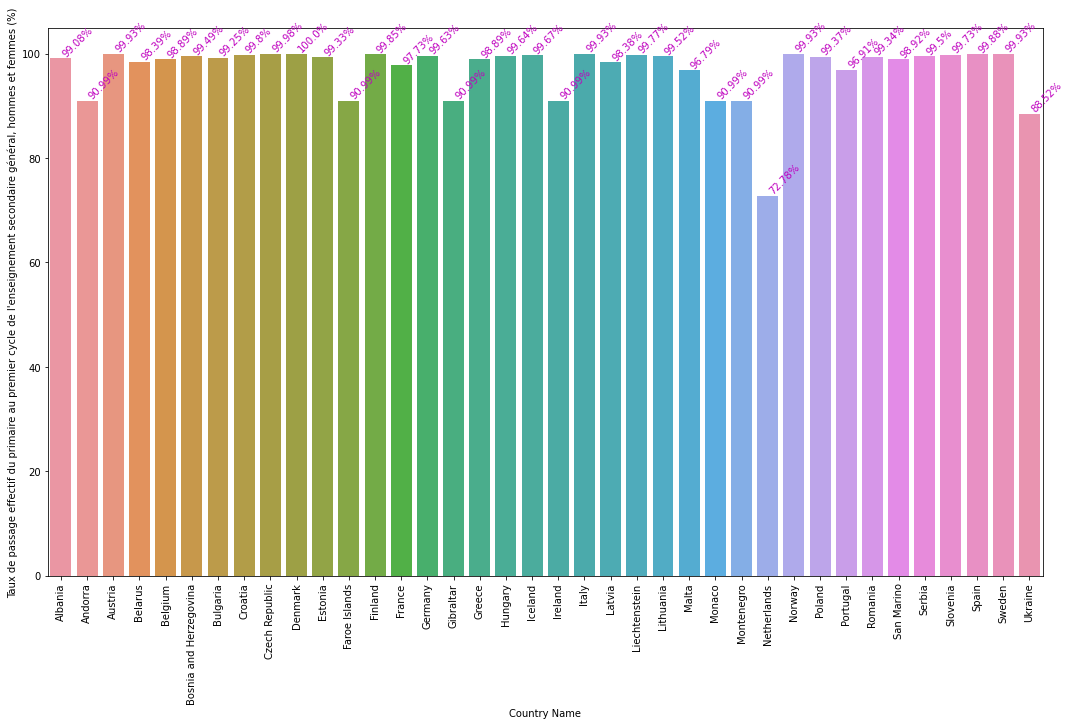

In [73]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x="Country Name", y= "Taux de passage effectif du primaire au premier cycle de l'enseignement secondaire général, hommes et femmes (%)",data=dataset_europe )
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.set(xlabel="Country Name", ylabel="Taux de passage effectif du primaire au premier cycle de l'enseignement secondaire général, hommes et femmes (%)")
for item in ax.get_xticklabels():
    item.set_rotation(90)
for i, v in enumerate(dataset_europe["Taux de passage effectif du primaire au premier cycle de l'enseignement secondaire général, hommes et femmes (%)"].iteritems()):        
    ax.text(i ,v[1], "{:,}%".format(round(v[1],2)), color='m', va ='bottom', 
    rotation=45)
plt.tight_layout()

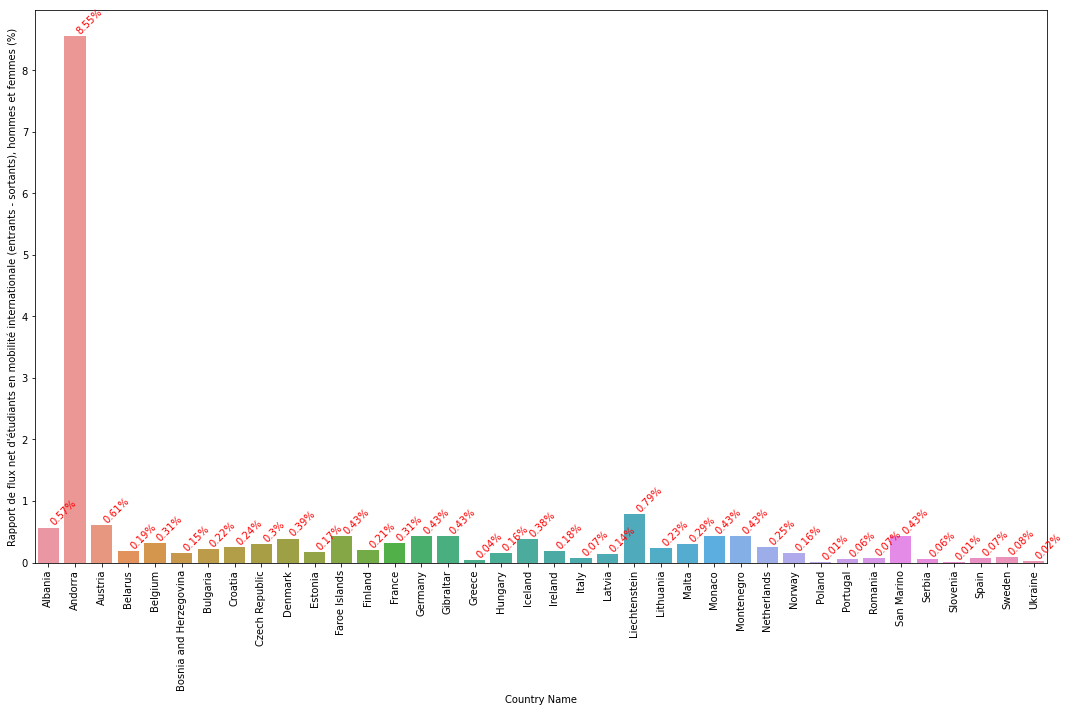

In [75]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x="Country Name", y= "Rapport de flux net d'étudiants en mobilité internationale (entrants - sortants), hommes et femmes (%)",data=dataset_europe )
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.set(xlabel="Country Name", ylabel="Rapport de flux net d'étudiants en mobilité internationale (entrants - sortants), hommes et femmes (%)")
for item in ax.get_xticklabels():
    item.set_rotation(90)
for i, v in enumerate(dataset_europe["Rapport de flux net d'étudiants en mobilité internationale (entrants - sortants), hommes et femmes (%)"].iteritems()):        
    ax.text(i ,v[1], "{:,}%".format(round(v[1],2)), color='r', va ='bottom', 
    rotation=45)
plt.tight_layout()

## Conclusion: quels pays selectionner en Europe ?

In [41]:
Moyenne_europe=pd.DataFrame(dataset_europe.mean()).rename(columns={0:"Moyenne"})
Moyenne_europe.reset_index(level=0).drop(0)

C:\Users\IHNI7670\AppData\Local\Temp\ipykernel_3784\2918483221.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Moyenne_europe=pd.DataFrame(dataset_europe.mean()).rename(columns={0:"Moyenne"})


,index,Moyenne
1,Taux d'abandon cumulé en dernière année du pre...,7.854928
2,Taux de passage effectif du primaire au premie...,96.964501
3,taux d'accés a internet,79.309904
4,Rapport de flux net d'étudiants en mobilité in...,0.469835
5,Taux de chômage,9.246816


#### Critere de seletion des pays

Apres une longue analyse sur les differentes indicateurs, l'Europe et l'Afrique sont les candidats potentiels pour projet selon les criteres de selection misent en place sur les indicateurs.

#### Liste des pays en europe qui rentre dans nos criteres de selection

un pays a un fort potentiel de bénéficier de nos service si :

    1- Le Taux d'abandon cumulé en dernière année du premier cycle de l'enseignement 
       secondaire est inferieur a la moyenne qui est de 7.854928%.

    2- Taux de passage effectif du primaire au premier cycle depasse la moyenne qui est de            96.964501%
    
    3- Le taux d'accés a internet dépasse la moyenne qui est 79.309904.
    
    4- le Rapport de flux net d'étudiants en mobilité internationale est inferieur a la 
       moyenne qui est de 0.469835.
       
    5- le Taux de chômage est inferieur a la moyenne qui est de 9.246816

In [42]:
dataset_europe.loc[
    (dataset_europe["Taux d'abandon cumulé en dernière année du premier cycle de l'enseignement secondaire général, hommes et femmes (%)"]<=7.854928)
    &(dataset_europe["Taux de passage effectif du primaire au premier cycle de l'enseignement secondaire général, hommes et femmes (%)"]>=96.964501)
    &(dataset_europe["taux d'accés a internet"]>=79.309904)
    &(dataset_europe["Rapport de flux net d'étudiants en mobilité internationale (entrants - sortants), hommes et femmes (%)"]<=0.469835)
    &(dataset_europe["Taux de chômage"]<=9.246816)
    ,:
]

,Unnamed: 0,Country Name,"Taux d'abandon cumulé en dernière année du premier cycle de l'enseignement secondaire général, hommes et femmes (%)","Taux de passage effectif du primaire au premier cycle de l'enseignement secondaire général, hommes et femmes (%)",taux d'accés a internet,"Rapport de flux net d'étudiants en mobilité internationale (entrants - sortants), hommes et femmes (%)",Taux de chômage
18,18,Belgium,5.54511,98.888344,86.516500,0.311098,7.8
52,52,Denmark,0.03228,99.998161,96.967785,0.390134,6.2
63,63,Estonia,0.37890,99.329590,87.237332,0.166112,6.8
71,71,Finland,0.09320,99.854156,87.703650,0.206324,8.8
94,94,Iceland,1.26428,99.674240,98.240016,0.384192,3.0
160,160,Norway,0.27088,99.932419,97.298204,0.158217,4.7
202,202,Sweden,0.36877,99.925453,91.506828,0.083248,7.0


#### 2-2) Les pays ayant un fort potentiel en Afrique

In [16]:
afrique_list=[
    "Angola",
    "Burkina Faso",
    "Burundi",
    "Benign",
    "Botswana",
    "Central African Republic",
    "Côte d'Ivoire",
    "Cameroon",
    "Djibouti",
    "Algeria",
    "Eritrea",
    "Ethiopia",
    "Gabon",
    "Ghana",
    "Guinea",
    "Equatorial Guinea",
    "Guinea-Bissau",
    "Kenya",
    "Comoros",
    "Liberia",
    "Lesotho",
    "Libya",
    "Morocco",
    "Madagascar",
    "mali",
    "Mauritania",
    "Mauritius",
    "Malawi",
    "mozambique",
    "Namibia",
    "Niger",
    "Nigeria",
    "Rwanda",
    "Seychelles",
    "Sudan",
    "Sierra Leone",
    "Senegal",
    "Somalia",
    "Sao Tome and Principe",
    "Swaziland",
    "Chad",
    "Togo",
    "Tunisia",
    "Tanzania",
    "Uganda",
    "South Africa",
    "Zambia",
    "Zimbabwe"
]
len(afrique_list)

48

In [17]:
dataset_afrique=dataset.loc[dataset['Country Name'].isin(afrique_list),:]
dataset_afrique.head()

,Unnamed: 0,Country Name,"Taux d'abandon cumulé en dernière année du premier cycle de l'enseignement secondaire général, hommes et femmes (%)","Taux de passage effectif du primaire au premier cycle de l'enseignement secondaire général, hommes et femmes (%)",taux d'accés a internet,"Rapport de flux net d'étudiants en mobilité internationale (entrants - sortants), hommes et femmes (%)",Taux de chômage
2,2,Algeria,26.107531,99.002136,42.945527,0.049754,11.500000
4,4,Angola,14.183500,52.481670,13.000000,0.427350,6.100000
25,25,Botswana,7.154490,97.469231,39.362997,0.253193,17.700001
30,30,Burkina Faso,28.521311,76.551033,13.960000,0.094434,3.100000
31,31,Burundi,21.028219,79.603973,5.173627,0.163992,1.500000


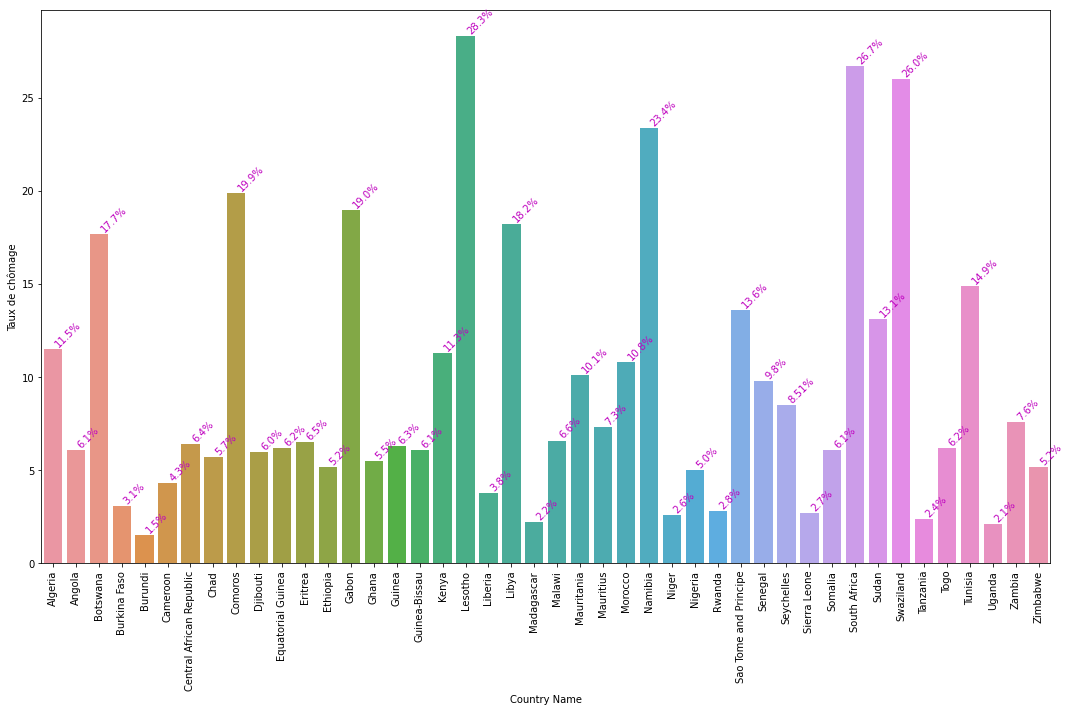

In [100]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x="Country Name", y= "Taux de chômage",data=dataset_afrique )
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.set(xlabel="Country Name", ylabel='Taux de chômage')
for item in ax.get_xticklabels():
    item.set_rotation(90)
for i, v in enumerate(dataset_afrique["Taux de chômage"].iteritems()):        
    ax.text(i ,v[1], "{:,}%".format(round(v[1],2)), color='m', va ='bottom', 
    rotation=45)
plt.tight_layout()

les dont 

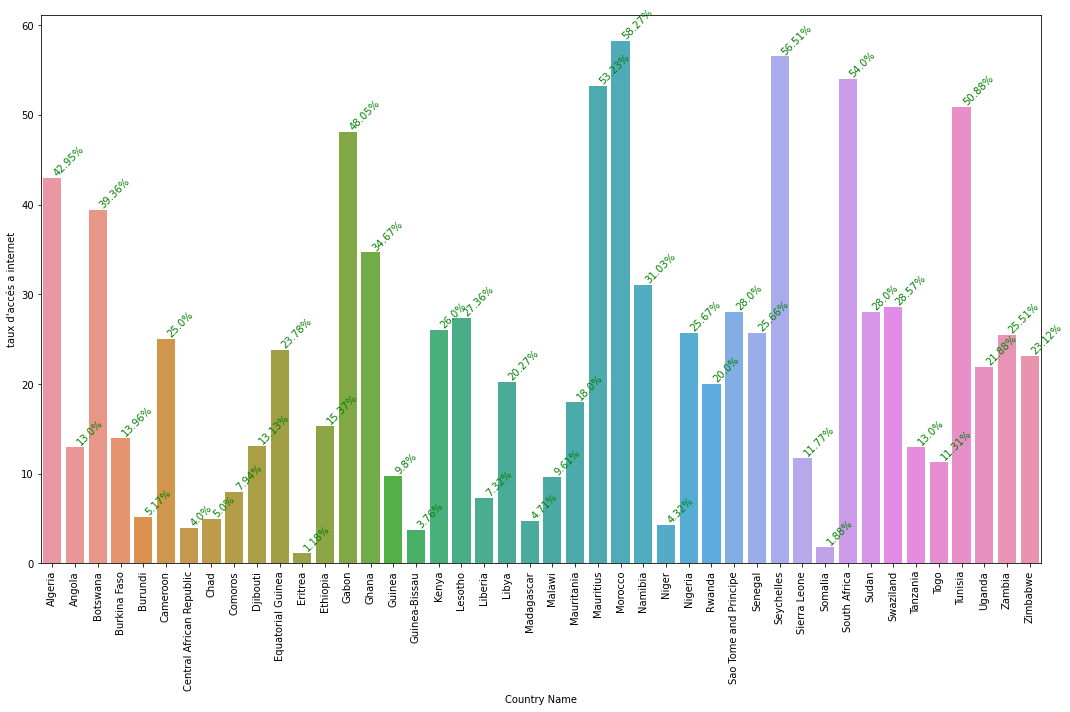

In [101]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x="Country Name", y= "taux d'accés a internet",data=dataset_afrique )
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.set(xlabel="Country Name", ylabel="taux d'accés a internet")
for item in ax.get_xticklabels():
    item.set_rotation(90)
for i, v in enumerate(dataset_afrique["taux d'accés a internet"].iteritems()):        
    ax.text(i ,v[1], "{:,}%".format(round(v[1],2)), color='g', va ='bottom', 
    rotation=45)
plt.tight_layout()

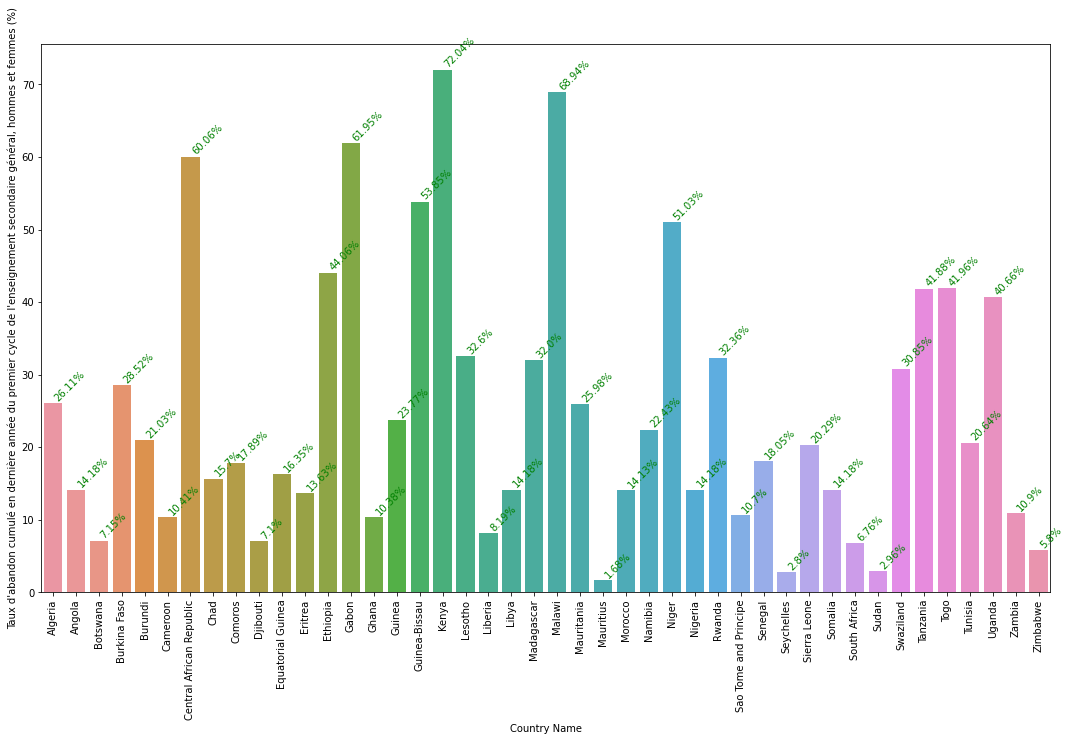

In [102]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x="Country Name", y= "Taux d'abandon cumulé en dernière année du premier cycle de l'enseignement secondaire général, hommes et femmes (%)",data=dataset_afrique )
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.set(xlabel="Country Name", ylabel="Taux d'abandon cumulé en dernière année du premier cycle de l'enseignement secondaire général, hommes et femmes (%)")
for item in ax.get_xticklabels():
    item.set_rotation(90)
for i, v in enumerate(dataset_afrique["Taux d'abandon cumulé en dernière année du premier cycle de l'enseignement secondaire général, hommes et femmes (%)"].iteritems()):        
    ax.text(i ,v[1], "{:,}%".format(round(v[1],2)), color='g', va ='bottom', 
    rotation=45)
plt.tight_layout()

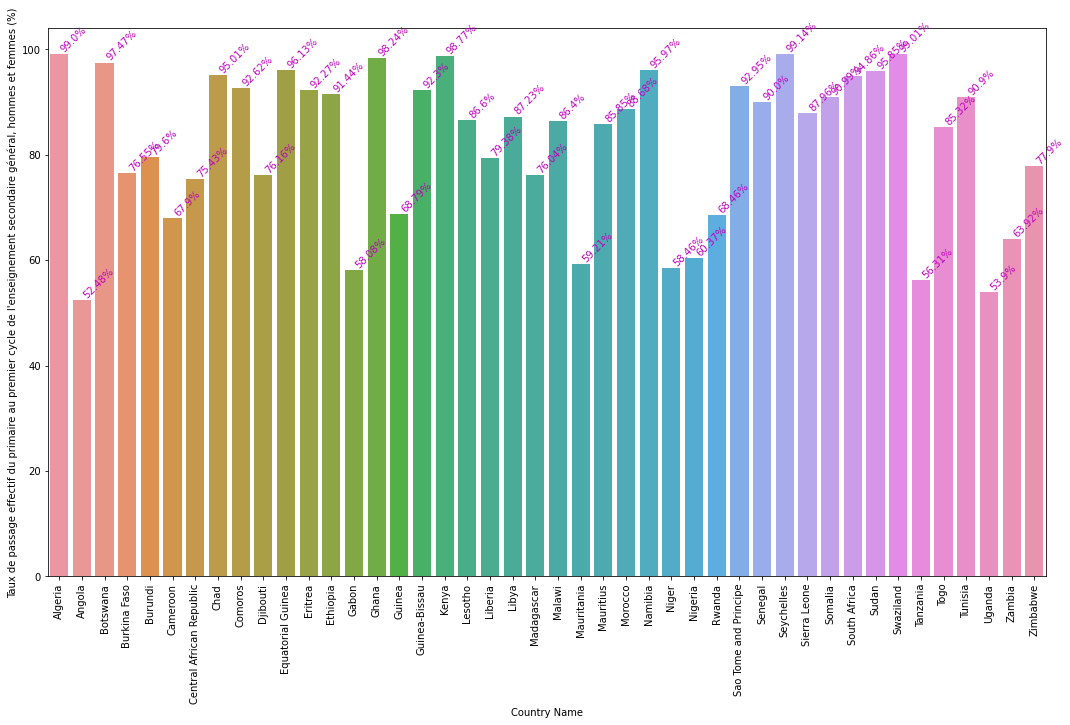

In [103]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x="Country Name", y= "Taux de passage effectif du primaire au premier cycle de l'enseignement secondaire général, hommes et femmes (%)",data=dataset_afrique)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.set(xlabel="Country Name", ylabel="Taux de passage effectif du primaire au premier cycle de l'enseignement secondaire général, hommes et femmes (%)")
for item in ax.get_xticklabels():
    item.set_rotation(90)
for i, v in enumerate(dataset_afrique["Taux de passage effectif du primaire au premier cycle de l'enseignement secondaire général, hommes et femmes (%)"].iteritems()):        
    ax.text(i ,v[1], "{:,}%".format(round(v[1],2)), color='m', va ='bottom', 
    rotation=45)
plt.tight_layout()

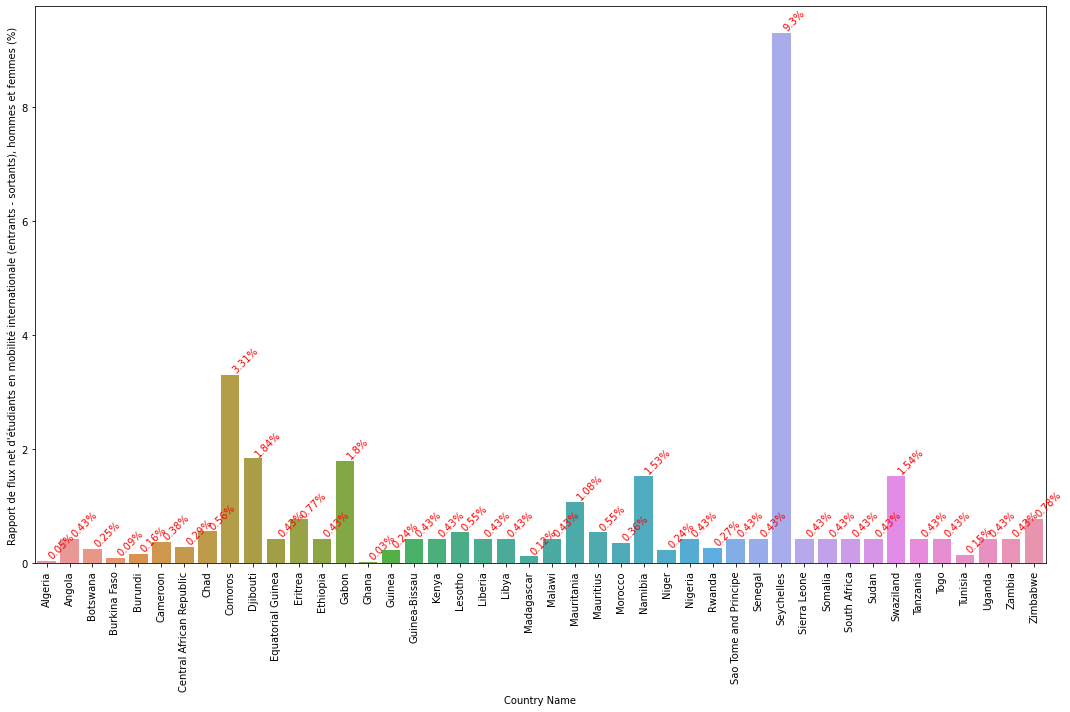

In [104]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x="Country Name", y= "Rapport de flux net d'étudiants en mobilité internationale (entrants - sortants), hommes et femmes (%)",data=dataset_afrique )
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.set(xlabel="Country Name", ylabel="Rapport de flux net d'étudiants en mobilité internationale (entrants - sortants), hommes et femmes (%)")
for item in ax.get_xticklabels():
    item.set_rotation(90)
for i, v in enumerate(dataset_afrique["Rapport de flux net d'étudiants en mobilité internationale (entrants - sortants), hommes et femmes (%)"].iteritems()):        
    ax.text(i ,v[1], "{:,}%".format(round(v[1],2)), color='r', va ='bottom', 
    rotation=45)
plt.tight_layout()

In [43]:
Moyenne_afrique=pd.DataFrame(dataset_afrique.mean()).rename(columns={0:"Moyenne"})
Moyenne_afrique.reset_index(level=0).drop(0)

C:\Users\IHNI7670\AppData\Local\Temp\ipykernel_3784\3379210831.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Moyenne_afrique=pd.DataFrame(dataset_afrique.mean()).rename(columns={0:"Moyenne"})


,index,Moyenne
1,Taux d'abandon cumulé en dernière année du pre...,24.780710
2,Taux de passage effectif du primaire au premie...,82.270240
3,taux d'accés a internet,22.545915
4,Rapport de flux net d'étudiants en mobilité in...,0.780710
5,Taux de chômage,9.416208


In [44]:
dataset_afrique.loc[
    (dataset_afrique["Taux d'abandon cumulé en dernière année du premier cycle de l'enseignement secondaire général, hommes et femmes (%)"]<=24.780710)
    &(dataset_afrique["Taux de passage effectif du primaire au premier cycle de l'enseignement secondaire général, hommes et femmes (%)"]>=82.270240)
    &(dataset_afrique["taux d'accés a internet"]>=22.545915)
    &(dataset_afrique["Rapport de flux net d'étudiants en mobilité internationale (entrants - sortants), hommes et femmes (%)"]<=0.469835)
    &(dataset_afrique["Taux de chômage"]<=9.416208)
    ,:
]

,Unnamed: 0,Country Name,"Taux d'abandon cumulé en dernière année du premier cycle de l'enseignement secondaire général, hommes et femmes (%)","Taux de passage effectif du primaire au premier cycle de l'enseignement secondaire général, hommes et femmes (%)",taux d'accés a internet,"Rapport de flux net d'étudiants en mobilité internationale (entrants - sortants), hommes et femmes (%)",Taux de chômage
61,61,Equatorial Guinea,16.35083,96.130898,23.780000,0.427350,6.2
78,78,Ghana,10.38444,98.240891,34.666001,0.025781,5.5
